# Time-evolving Block Decimation on Finite Spin Chains

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import quimb.tensor as qtn

from tebd.hamiltonian import LocalHeisenbergHamiltonian
from tebd.hamiltonian import LocalIsingHamiltonian
from tebd.hamiltonian import HeisenbergHamiltonian
from tebd.hamiltonian import IsingHamiltonian
from tebd.matrix_product_states import MatrixProductState
from tebd.tebd import run_tebd
from tebd.tebd import TEBD

In [2]:
d = 2
N = 6
bond_dim = 3

In [3]:
lmda = 0
loc_ham_ising = LocalIsingHamiltonian(N, lmda)
glob_ham_ising = IsingHamiltonian(N, lmda)

In [4]:
loc_ham_ising.hamiltonians[0]

[[0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]]

In [5]:
MPS = MatrixProductState(d=d, N=N, bond_dim=bond_dim)

In [6]:
MPS.data

[Tensor(shape=(2, 3), inds=('k0', 'i0'), tags=oset(['state 1'])),
 Tensor(shape=(3, 3), inds=('i0', 'i1'), tags=oset(['SV 1'])),
 Tensor(shape=(3, 2, 3), inds=('i1', 'k1', 'i2'), tags=oset(['state 2'])),
 Tensor(shape=(3, 3), inds=('i2', 'i3'), tags=oset(['SV 2'])),
 Tensor(shape=(3, 2, 3), inds=('i3', 'k2', 'i4'), tags=oset(['state 3'])),
 Tensor(shape=(3, 3), inds=('i4', 'i5'), tags=oset(['SV 3'])),
 Tensor(shape=(3, 2, 3), inds=('i5', 'k3', 'i6'), tags=oset(['state 4'])),
 Tensor(shape=(3, 3), inds=('i6', 'i7'), tags=oset(['SV 4'])),
 Tensor(shape=(3, 2, 3), inds=('i7', 'k4', 'i8'), tags=oset(['state 5'])),
 Tensor(shape=(3, 3), inds=('i8', 'i9'), tags=oset(['SV 5'])),
 Tensor(shape=(3, 2), inds=('i9', 'k5'), tags=oset(['state 6']))]

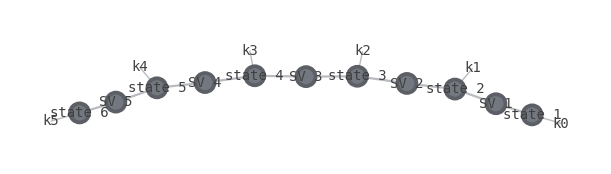

In [7]:
qtn.TensorNetwork(MPS.data).draw()

Make sure the state is normalized.

In [8]:
MPS.norm()

1.0

Look at the density matrix.

In [9]:
rho = MPS.rho()

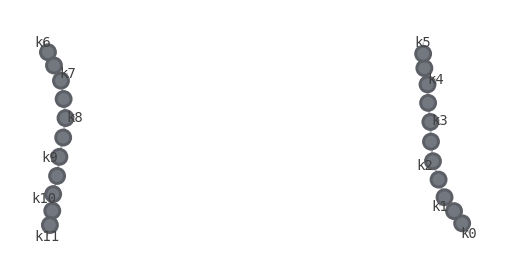

In [10]:
rho.draw(figsize=(5, 5))

Create TEBD object.

In [11]:
tebd_obj = TEBD(MPS, loc_ham_ising, glob_ham_ising, evol_type="imag")

Evolve state.

In [12]:
tau = 0.1
num_iter = 500
mid_steps = 100

The energy goes to $-N + 1 = -5$.

In [13]:
energies, wave_functions = run_tebd(tebd_obj, tau, num_iter, mid_steps)

Iteration: 0 of 500, energy: 4.884910253710652
Iteration: 100 of 500, energy: -4.999999999999998
Iteration: 200 of 500, energy: -5.0
Iteration: 300 of 500, energy: -5.0
Iteration: 400 of 500, energy: -5.000000000000001


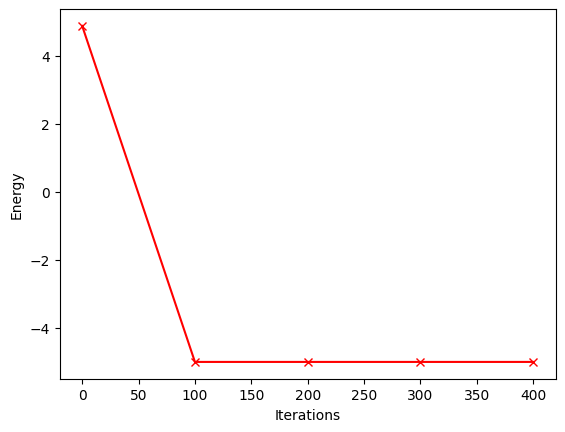

In [14]:
plt.plot(range(0, num_iter, mid_steps), energies, "rx-")
plt.xlabel("Iterations")
plt.ylabel("Energy");

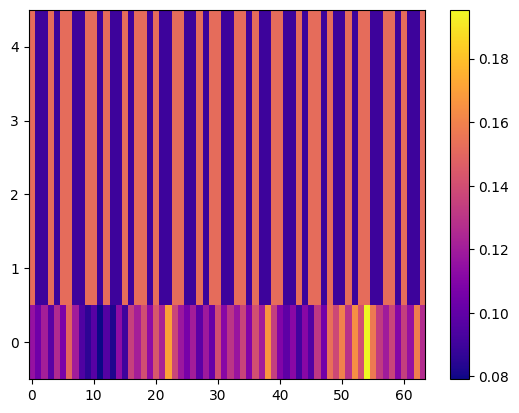

In [15]:
plt.imshow(
    np.abs(wave_functions),
    origin="lower",
    cmap="plasma",
    aspect="auto"
)
plt.colorbar();

Start with one particular state.

In [16]:
state_all_spins_up = MatrixProductState.init_from_state('000000')

In [17]:
state_all_spins_up.wave_function()

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
state_all_spins_up.norm()

1.0

In [19]:
tebd_obj = TEBD(state_all_spins_up, loc_ham_ising, glob_ham_ising, evol_type="imag", bond_dim=bond_dim)

In [20]:
energies, wave_functions = run_tebd(tebd_obj, tau, num_iter, mid_steps)

Iteration: 0 of 500, energy: 0j
Iteration: 100 of 500, energy: -5.0
Iteration: 200 of 500, energy: -4.999999999999999
Iteration: 300 of 500, energy: -5.000000000000002
Iteration: 400 of 500, energy: -5.000000000000001


## $\lambda = 0$

Run various scenarios in batch.

In [21]:
d = 2
bond_dim = 2
lmda = 0

In [22]:
tau = 0.01
num_iter = 500
mid_steps = 100

In [23]:
N_list = range(3, 15)

In [24]:
energies = []

for N in N_list:
    # create matrix product states
    MPS = MatrixProductState(d=d, N=N, bond_dim=bond_dim)

    # create Hamiltonians
    loc_ham_ising = LocalIsingHamiltonian(N, lmda)
    glob_ham_ising = IsingHamiltonian(N, lmda)

    # create TEBD object
    tebd_obj = TEBD(MPS, loc_ham_ising, glob_ham_ising, evol_type="imag")

    # run algorithm
    energies_N, wave_functions_N = run_tebd(tebd_obj, tau, num_iter, mid_steps)

    energies.append(energies_N[-1])

Iteration: 0 of 500, energy: 1.3205010526250915
Iteration: 100 of 500, energy: -1.9470396411341735
Iteration: 200 of 500, energy: -1.9991812804704319
Iteration: 300 of 500, energy: -1.9999850572873685
Iteration: 400 of 500, energy: -1.9999997263323477
Iteration: 0 of 500, energy: 2.4149715611451583
Iteration: 100 of 500, energy: -2.7258294583898635
Iteration: 200 of 500, energy: -2.9946033096325886
Iteration: 300 of 500, energy: -2.9999010005303983
Iteration: 400 of 500, energy: -2.9999981867090417
Iteration: 0 of 500, energy: 2.7966614701579955
Iteration: 100 of 500, energy: -3.900873654751333
Iteration: 200 of 500, energy: -3.999345268009587
Iteration: 300 of 500, energy: -3.9999884128621988
Iteration: 400 of 500, energy: -3.9999997879099896
Iteration: 0 of 500, energy: 4.148811688133405
Iteration: 100 of 500, energy: -3.122726402894412
Iteration: 200 of 500, energy: -4.980338234546021
Iteration: 300 of 500, energy: -4.999644608053753
Iteration: 400 of 500, energy: -4.999993492324622

In [25]:
energies_theoretical = [-N + 1 for N in N_list]

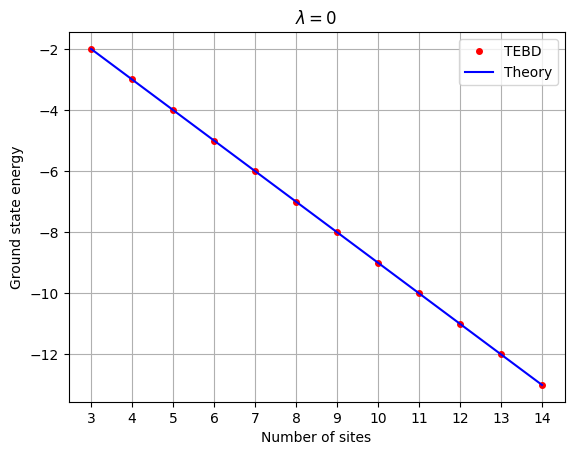

In [26]:
plt.plot(N_list, energies, 'ro', label="TEBD", markersize=4)
plt.plot(N_list, energies_theoretical, "b-", label="Theory")
plt.xlabel("Number of sites")
plt.ylabel("Ground state energy")
plt.xticks(N_list)
plt.legend()
plt.title("$\lambda=0$")
plt.grid()
plt.savefig('../figures/ground_state_energy_lambda_0.png', bbox_inches='tight', dpi=300);

## $\lambda = 100$

Run with external field.

In [27]:
d = 2
bond_dim = 2
lmda = 100

In [28]:
energies_ext_field = []

for N in N_list:
    # create matrix product states
    MPS = MatrixProductState(d=d, N=N, bond_dim=bond_dim)

    # create Hamiltonians
    loc_ham_ising = LocalIsingHamiltonian(N, lmda)
    glob_ham_ising = IsingHamiltonian(N, lmda)

    # create TEBD object
    tebd_obj = TEBD(MPS, loc_ham_ising, glob_ham_ising, evol_type="imag")

    # run algorithm
    energies_N, wave_functions_N = run_tebd(tebd_obj, tau, num_iter, mid_steps)

    energies_ext_field.append(energies_N[-1])

Iteration: 0 of 500, energy: -50.350939336294424
Iteration: 100 of 500, energy: -300.0031209758118
Iteration: 200 of 500, energy: -300.0031209758118
Iteration: 300 of 500, energy: -300.0031209758118
Iteration: 400 of 500, energy: -300.0031209758118
Iteration: 0 of 500, energy: -142.3063542081056
Iteration: 100 of 500, energy: -400.00374133964976
Iteration: 200 of 500, energy: -400.0037413396498
Iteration: 300 of 500, energy: -400.00374133964976
Iteration: 400 of 500, energy: -400.00374133964976
Iteration: 0 of 500, energy: -22.85560125221175
Iteration: 100 of 500, energy: -500.00436170460245
Iteration: 200 of 500, energy: -500.00436170460245
Iteration: 300 of 500, energy: -500.0043617046027
Iteration: 400 of 500, energy: -500.0043617046027
Iteration: 0 of 500, energy: -273.23879293725804
Iteration: 100 of 500, energy: -600.0049820695555
Iteration: 200 of 500, energy: -600.0049820695554
Iteration: 300 of 500, energy: -600.0049820695555
Iteration: 400 of 500, energy: -600.0049820695555
I

In [29]:
energies_theoretical_ext_field = [-N * lmda for N in N_list]

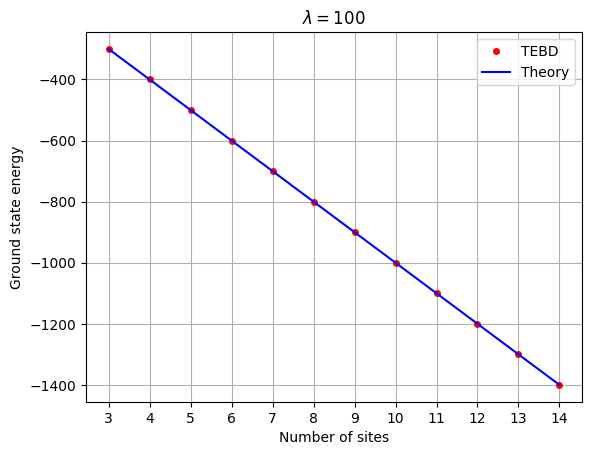

In [30]:
plt.plot(N_list, energies_ext_field, 'ro', label="TEBD", markersize=4)
plt.plot(N_list, energies_theoretical_ext_field, "b-", label="Theory")
plt.xlabel("Number of sites")
plt.ylabel("Ground state energy")
plt.xticks(N_list)
plt.legend()
plt.title("$\lambda=100$")
plt.grid()
plt.savefig('../figures/ground_state_energy_lambda_100.png', bbox_inches='tight', dpi=300);

## Heisenberg Model

Run the Heisenberg model.

In [31]:
N_list = range(3, 10)

In [32]:
d = 2
bond_dim = 2
tau = 0.01
num_iter = 500
mid_steps = 100

In [33]:
energies = []

for N in N_list:
    # create matrix product states
    MPS = MatrixProductState(d=d, N=N, bond_dim=bond_dim)

    # create Hamiltonians
    loc_ham_heis = LocalHeisenbergHamiltonian(N)
    glob_ham_heis = HeisenbergHamiltonian(N)

    # create TEBD object
    tebd_obj = TEBD(MPS, loc_ham_heis, glob_ham_heis, evol_type="imag")

    # run algorithm
    energies_N, wave_functions_N = run_tebd(tebd_obj, tau, num_iter, mid_steps)

    energies.append(energies_N[-1])

Iteration: 0 of 500, energy: 0.5048154949331252
Iteration: 100 of 500, energy: -3.9984552308974295
Iteration: 200 of 500, energy: -3.9996881647005713
Iteration: 300 of 500, energy: -3.9996998426652244
Iteration: 400 of 500, energy: -3.9997000535576044
Iteration: 0 of 500, energy: 2.358357510122863
Iteration: 100 of 500, energy: -5.9119922125878
Iteration: 200 of 500, energy: -6.158445352278758
Iteration: 300 of 500, energy: -6.161861442590967
Iteration: 400 of 500, energy: -6.161922210492813
Iteration: 0 of 500, energy: 3.3094727213701
Iteration: 100 of 500, energy: -7.579733782325659
Iteration: 200 of 500, energy: -7.5847846542862305
Iteration: 300 of 500, energy: -7.584777807213726
Iteration: 400 of 500, energy: -7.58477748460987
Iteration: 0 of 500, energy: 4.332387282120978
Iteration: 100 of 500, energy: -7.704006192261357
Iteration: 200 of 500, energy: -8.066163197657598
Iteration: 300 of 500, energy: -9.344583584966168
Iteration: 400 of 500, energy: -9.436296052849714
Iteration: 

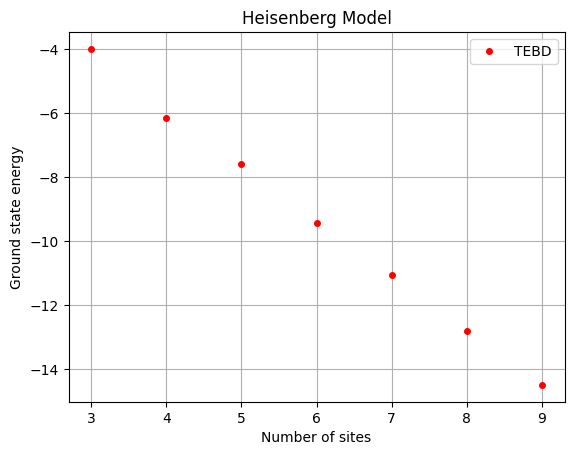

In [34]:
plt.plot(N_list, energies, 'ro', label="TEBD", markersize=4)
plt.xlabel("Number of sites")
plt.ylabel("Ground state energy")
plt.xticks(N_list)
plt.legend()
plt.title("Heisenberg Model")
plt.grid()
plt.savefig('../figures/ground_state_energy_heis_model.png', bbox_inches='tight', dpi=300);